# Sitt Hmue Paing

## Research question/interests

My research question is to find whether the number of reviewers influence the score. (focussing on very positive ratings)
- How many games that have a very positive and mixed reviews for both overall and recent reviews?
- Does the percent score for different review games being influenced by the percent of reviewers?

# EDA

- Import pandas and numpy
- Load the file (steam_games.csv)

In [635]:
import pandas as pd
import numpy as np

1. Successfully read the file and it display all columns and rows.

In [636]:
gamedataset = pd.read_csv("../data/raw/steam_games.csv")
gamedataset.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


# Data Pipeline

2. Remove the columns in the table to will not be use to make the table cleaner

In [637]:
import project_functions3 as pf
# gamedata=(
#     gamedataset
#     .drop(columns=["url", "types", "game_description", "achievements", "minimum_requirements", "mature_content","recommended_requirements", "discount_price"])
#     .drop_duplicates(subset=["name"], inplace=False)
# )
# gamedata


gamedata = pf.dataloadnclean("../data/raw/steam_games.csv")
gamedata

,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price
0,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99
3,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free
...,...,...,...,...,...,...,...,...,...,...,...,...
40828,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation",$2.99
40829,Rocksmith® 2014 Edition – Remastered – Stone T...,NaN,NaN,NaN,"Feb 5, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation",$2.99
40830,Fantasy Grounds - Quests of Doom 4: A Midnight...,NaN,NaN,NaN,"Jul 31, 2018","SmiteWorks USA, LLC",NaN,"RPG,Indie,Strategy,Software,Turn-Based,Fantasy...","Multi-player,Co-op,Cross-Platform Multiplayer,...",English,"Indie,RPG,Strategy",$7.99
40831,Mega Man X5 Sound Collection,NaN,NaN,NaN,"Jul 24, 2018","CAPCOM CO., LTD","CAPCOM CO., LTD,CAPCOM CO., LTD",Action,"Single-player,Downloadable Content,Steam Achie...","English,French,Italian,German,Spanish - Spain,...",Action,$9.99


3. Sorting the date in an ascending order.

In [638]:
gamedata.sort_values(by=['release_date'], ascending= True)
gamedata.head()

,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price
0,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99
3,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free


4. Remove the column that contains bundle so that the analysis can be done on the game app to make things less complicated.

In [639]:
df= gamedataset[gamedataset["types"].str.contains("bundle")==False]
df

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

# Data Analysis

Checking the unique ratings in all_reviews 

In [640]:
gamedata['all_reviews'].unique()

array(['Very Positive,(42,550),- 92% of the 42,550 user reviews for this game are positive.',
       'Mixed,(836,608),- 49% of the 836,608 user reviews for this game are positive.',
       'Mostly Positive,(7,030),- 71% of the 7,030 user reviews for this game are positive.',
       ...,
       'Mixed,(2,044),- 55% of the 2,044 user reviews for this game are positive.',
       'Very Positive,(106),- 99% of the 106 user reviews for this game are positive.',
       'Very Positive,(469),- 96% of the 469 user reviews for this game are positive.'],
      dtype=object)

In [641]:
gamedata['recent_reviews'].unique()

array(['Very Positive,(554),- 89% of the 554 user reviews in the last 30 days are positive.',
       'Mixed,(6,214),- 49% of the 6,214 user reviews in the last 30 days are positive.',
       'Mixed,(166),- 54% of the 166 user reviews in the last 30 days are positive.',
       ...,
       'Very Negative,(20),- 15% of the 20 user reviews in the last 30 days are positive.',
       'Very Negative,(13),- 7% of the 13 user reviews in the last 30 days are positive.',
       'Mixed,(40),- 50% of the 40 user reviews in the last 30 days are positive.'],
      dtype=object)

# Splitting all_reviews column into different column (Rating and Numbers of users rated) and drop all_review column.
# Rating show wide range of users review (positive, Mixed Negative, etc..)

### Since the all_reviews column have is mixed with integer and string, I split them into columns for easier analysis.

# Splitting all_reviews column into different column (Number of users rated and Percentage of positive reviews ) and drop Number of users rated column.

### Number of Users show the amount of people in total that review the game.


# Splitting Percentage of positive reviews into different column (Percentage of positive rating) and drop Percentage of positive reviews, Number of users and Numbers column.

### The result I am looking for is to get the percentage of the users that review the game as positive. The below column (Percentage of positive rating) shows the overall percentage of users rating the game as positive.

In [642]:
# new data frame with split value columns
df = gamedata
new = gamedata["all_reviews"].str.split(",", n = 1, expand = True)

gamedata.dropna(inplace = True)
 
# making separate first name column from new data frame
gamedata["Rating"]= new[0]

# making separate last name column from new data frame
gamedata["Number of users rated"]= new[1]
 
# Dropping old Name columns
gamedata.drop(columns =["all_reviews"], inplace = True)

# new data frame with split value columns
new = gamedata["Number of users rated"].str.split(",-", n = 1, expand = True)
 
# making separate first name column from new data frame
gamedata["Number of users"]= new[0]

# making separate last name column from new data frame
gamedata["Percentage of positive reviews"]= new[1]

gamedata.drop(columns =["Number of users rated"], inplace = True)

# new data frame with split value columns
new = gamedata["Percentage of positive reviews"].str.split("%", n = 1, expand = True)
 
# making separate first name column from new data frame
gamedata["Percentage of positive rating"]= new[0]

# making separate last name column from new data frame
gamedata["Numbers"]= new[1]

gamedata.drop(columns =["Percentage of positive reviews"], inplace = True)
gamedata.drop(columns =["Numbers"], inplace = True)
# gamedata.drop(columns =["Number of users"], inplace = True)
 
# df display
gamedata

,name,desc_snippet,recent_reviews,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price,Rating,Number of users,Percentage of positive rating
0,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99,Very Positive,"(42,550)",92
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99,Mixed,"(836,608)",49
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99,Mostly Positive,"(7,030)",71
3,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99,Mixed,"(167,115)",61
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free,Mostly Positive,"(11,481)",74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32238,The Wild Age,The Wild Age is a micromanagement strategy gam...,"Mixed,(10),- 40% of the 10 user reviews in the...","Mar 7, 2019",McMagic Productions,"McMagic Productions,McMagic Productions","Early Access,Casual,Strategy,Simulation,Early ...","Single-player,Steam Achievements,Full controll...","English,French,Russian,Czech,Spanish - Spain,D...","Casual,Indie,Simulation,Strategy,Early Access",$14.99,Mostly Positive,(61),75
34570,eSports Legend / 电竞传奇,Esports Legend is a Esports club simulator. Yo...,"Very Positive,(12),- 83% of the 12 user review...","Oct 16, 2018",90Games,"Coconut Island Games,Coconut Island Games","Indie,Strategy,Simulation,Casual,Management,e-...","Single-player,Steam Achievements,Steam Cloud","English,Simplified Chinese","Casual,Indie,Simulation,Strategy",$9.99,Mixed,(593),62
35297,KARAKARA,KARAKARA. It is the sound of aridity. It is th...,"Very Positive,(19),- 94% of the 19 user review...","Jun 27, 2016",calme,"Sekai Project,Sekai Project","Visual Novel,Anime,Sexual Content,Nudity,Cute,...","Single-player,Steam Achievements,Steam Trading...","English,Japanese,Traditional Chinese,German","Casual,Indie",$9.99,Overwhelmingly Positive,(789),96
38390,Moto Racer 4,Choose from a variety of daring riders and get...,"Mixed,(19),- 42% of the 19 user reviews in the...","Nov 3, 2016",Artefacts Studios,"Microids,Microids","Racing,Sports,Action,Multiplayer,Offroad,Arcad...","Single-player,Online Multi-Player,Shared/Split...","English,French,Italian,German,Spanish - Spain,...",Racing,$14.99,Mixed,(83),59


### This step is also split the columns like the I have done previously for all_reviews column but this time, its on recent_reviews column.
### I am repeating the same steps as I have done above for recent_reviews

In [643]:
# new data frame with split value columns
new = gamedata["recent_reviews"].str.split(",", n = 1, expand = True)

gamedata.dropna(inplace = True)
 
# making separate first name column from new data frame
gamedata["Rating(Recent Review)"]= new[0]

# making separate last name column from new data frame
gamedata["Number of users rated(Recent Review)"]= new[1]
 
# Dropping old Name columns
gamedata.drop(columns =["recent_reviews"], inplace = True)


# new data frame with split value columns
new = gamedata["Number of users rated(Recent Review)"].str.split(",-", n = 1, expand = True)
 
# making separate first name column from new data frame
gamedata["Number of users(Recent Review)"]= new[0]

# making separate last name column from new data frame
gamedata["Percentage of positive reviews(Recent Review)"]= new[1]

gamedata.drop(columns =["Number of users rated(Recent Review)"], inplace = True)


new = gamedata["Percentage of positive reviews(Recent Review)"].str.split("%", n = 1, expand = True)
 
# making separate first name column from new data frame
gamedata["Percentage of positive rating(Recent Review)"]= new[0]

# making separate last name column from new data frame
gamedata["Numbers(Recent Review)"]= new[1]

gamedata.drop(columns =["Percentage of positive reviews(Recent Review)"], inplace = True)
gamedata.drop(columns =["Numbers(Recent Review)"], inplace = True)
# gamedata.drop(columns =["Number of users(Recent Review)"], inplace = True)
 
# df display
gamedata

,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price,Rating,Number of users,Percentage of positive rating,Rating(Recent Review),Number of users(Recent Review),Percentage of positive rating(Recent Review)
0,DOOM,Now includes all three premium DLC packs (Unto...,"May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99,Very Positive,"(42,550)",92,Very Positive,(554),89
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99,Mixed,"(836,608)",49,Mixed,"(6,214)",49
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99,Mostly Positive,"(7,030)",71,Mixed,(166),54
3,DayZ,The post-soviet country of Chernarus is struck...,"Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99,Mixed,"(167,115)",61,Mixed,(932),57
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free,Mostly Positive,"(11,481)",74,Mixed,(287),54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32238,The Wild Age,The Wild Age is a micromanagement strategy gam...,"Mar 7, 2019",McMagic Productions,"McMagic Productions,McMagic Productions","Early Access,Casual,Strategy,Simulation,Early ...","Single-player,Steam Achievements,Full controll...","English,French,Russian,Czech,Spanish - Spain,D...","Casual,Indie,Simulation,Strategy,Early Access",$14.99,Mostly Positive,(61),75,Mixed,(10),40
34570,eSports Legend / 电竞传奇,Esports Legend is a Esports club simulator. Yo...,"Oct 16, 2018",90Games,"Coconut Island Games,Coconut Island Games","Indie,Strategy,Simulation,Casual,Management,e-...","Single-player,Steam Achievements,Steam Cloud","English,Simplified Chinese","Casual,Indie,Simulation,Strategy",$9.99,Mixed,(593),62,Very Positive,(12),83
35297,KARAKARA,KARAKARA. It is the sound of aridity. It is th...,"Jun 27, 2016",calme,"Sekai Project,Sekai Project","Visual Novel,Anime,Sexual Content,Nudity,Cute,...","Single-player,Steam Achievements,Steam Trading...","English,Japanese,Traditional Chinese,German","Casual,Indie",$9.99,Overwhelmingly Positive,(789),96,Very Positive,(19),94
38390,Moto Racer 4,Choose from a variety of daring riders and get...,"Nov 3, 2016",Artefacts Studios,"Microids,Microids","Racing,Sports,Action,Multiplayer,Offroad,Arcad...","Single-player,Online Multi-Player,Shared/Split...","English,French,Italian,German,Spanish - Spain,...",Racing,$14.99,Mixed,(83),59,Mixed,(19),42


### Displaying the name that only have very positive rating from the users for different games to do the analysis
### Removing all the other columns that is not needed for analysis to have a clear dataset and easy to look at.
### The aim is to find the relationship between the percentage of positive rating for(All_Review) compared to Percentage of positive rating(Recent Review)

In [644]:
tempt = gamedata[gamedata['Rating'].str.contains('Very Positive')]
tempt = tempt[tempt["Rating(Recent Review)"].str.contains("Mostly Negative")==False]
tempt = tempt[tempt["Rating(Recent Review)"].str.contains("Mostly Positive")==False]
tempt = tempt[tempt["Rating(Recent Review)"].str.contains("Overwhelmingly Positive")==False]
tempt = tempt[tempt["Rating(Recent Review)"].str.contains("Mixed")==False]

tempt=(
    tempt
    .drop(columns=["desc_snippet", "developer", "publisher", "popular_tags", "game_details", "languages","genre", "original_price"])
    
)

tempt['Number of users']=tempt['Number of users'].str.replace(r'[()]+', '', regex=True)
tempt['Number of users']=tempt['Number of users'].str.replace(r'[,]+', '', regex=True)
tempt['Number of users(Recent Review)']=tempt['Number of users(Recent Review)'].str.replace(r'[()]+', '', regex=True)
tempt['Number of users(Recent Review)']=tempt['Number of users(Recent Review)'].str.replace(r'[,]+', '', regex=True)

tempt.head(20)


,name,release_date,Rating,Number of users,Percentage of positive rating,Rating(Recent Review),Number of users(Recent Review),Percentage of positive rating(Recent Review)
0,DOOM,"May 12, 2016",Very Positive,42550,92,Very Positive,554,89
6,Devil May Cry 5,"Mar 7, 2019",Very Positive,9645,92,Very Positive,408,87
7,Human: Fall Flat,"Jul 22, 2016",Very Positive,23763,91,Very Positive,629,91
8,They Are Billions,"Dec 12, 2017",Very Positive,12127,85,Very Positive,192,83
10,For The King,"Apr 19, 2018",Very Positive,4600,83,Very Positive,67,80
11,Danganronpa V3: Killing Harmony,"Sep 25, 2017",Very Positive,3547,84,Very Positive,78,82
16,Clone Drone in the Danger Zone,"Mar 16, 2017",Very Positive,1901,94,Very Positive,88,94
19,Halo Wars: Definitive Edition,"Apr 20, 2017",Very Positive,2442,88,Very Positive,28,82
21,Phoenix Wright: Ace Attorney Trilogy / 逆転裁判123...,"Apr 9, 2019",Very Positive,382,97,Very Positive,47,95
27,Viscera Cleanup Detail,"Oct 23, 2015",Very Positive,5414,92,Very Positive,61,91


c:\Users\sitth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36870 (\N{CJK UNIFIED IDEOGRAPH-9006}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sitth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sitth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35009 (\N{CJK UNIFIED IDEOGRAPH-88C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sitth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21028 (\N{CJK UNIFIED IDEOGRAPH-5224}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sitth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(b

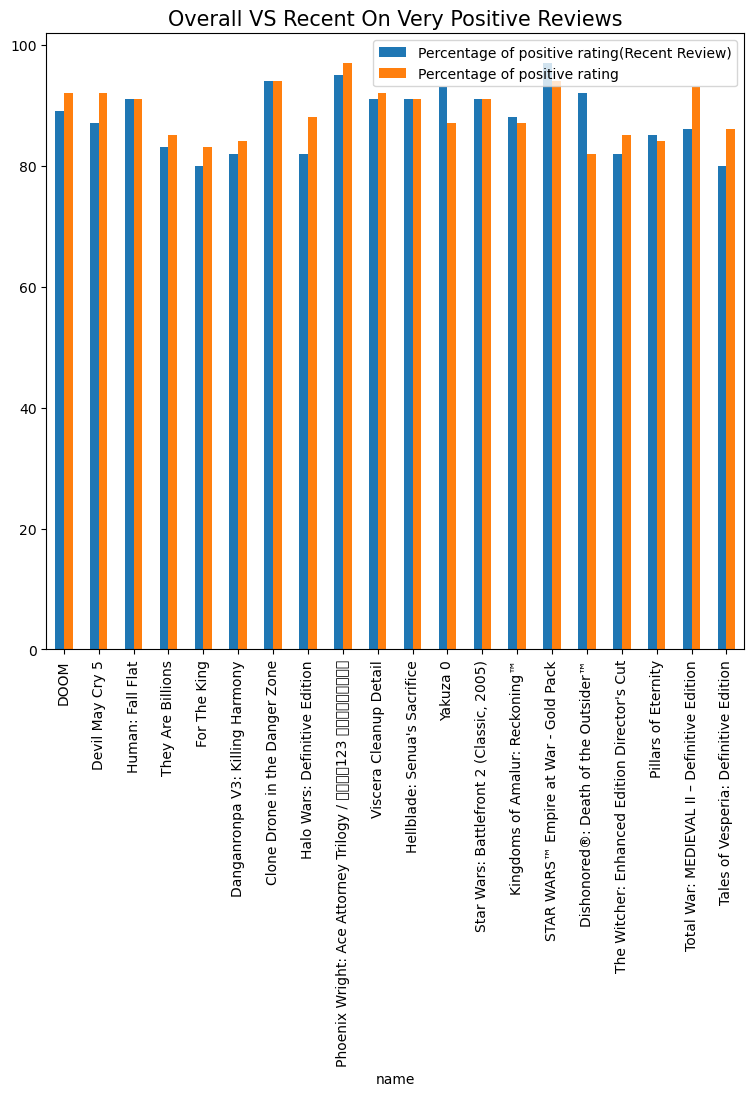

In [645]:
import pandas as pd
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt


tempt['Percentage of positive rating(Recent Review)']=df['Percentage of positive rating(Recent Review)'].astype(int)
tempt['Percentage of positive rating']=df['Percentage of positive rating'].astype(int)

data = tempt.head(20)
df = pd.DataFrame(data, columns= ["name","Percentage of positive rating(Recent Review)", "Percentage of positive rating"])

df.plot(x="name", y = ["Percentage of positive rating(Recent Review)", "Percentage of positive rating"], kind ="bar", figsize=(9,8))
plt.title("Overall VS Recent On Very Positive Reviews", fontsize = 15)

mp.show()


In this step, I am only trying to get mixed feedback from the overall and recent reviews. Both overall and recent reviews have the same mixed reviews and I have filtered out any other reviews that is not needed. It shows that there is 287 rows that have mixed reviews for both overall and recent review columns.

In [646]:
tempt2 = gamedata[gamedata['Rating'].str.contains('Mixed')]
tempt2 = tempt2[tempt2["Rating(Recent Review)"].str.contains("Very Positive")==False]
tempt2 = tempt2[tempt2["Rating(Recent Review)"].str.contains("Mostly Negative")==False]
tempt2 = tempt2[tempt2["Rating(Recent Review)"].str.contains("Mostly Positive")==False]
tempt2 = tempt2[tempt2["Rating(Recent Review)"].str.contains("Overwhelmingly Positive")==False]

tempt2['Number of users']=tempt2['Number of users'].str.replace(r'[()]+', '', regex=True)
tempt2['Number of users']=tempt2['Number of users'].str.replace(r'[,]+', '', regex=True)
tempt2['Number of users(Recent Review)']=tempt2['Number of users(Recent Review)'].str.replace(r'[()]+', '', regex=True)
tempt2['Number of users(Recent Review)']=tempt2['Number of users(Recent Review)'].str.replace(r'[,]+', '', regex=True)

tempt2=(
    tempt2
    .drop(columns=["desc_snippet", "release_date", "developer", "publisher", "popular_tags", "game_details", "languages","genre", "original_price"])
    
)
tempt2.head(20)

,name,Rating,Number of users,Percentage of positive rating,Rating(Recent Review),Number of users(Recent Review),Percentage of positive rating(Recent Review)
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,836608,49,Mixed,6214,49
3,DayZ,Mixed,167115,61,Mixed,932,57
13,Call of Duty®: Modern Warfare® Remastered,Mixed,1118,51,Mixed,33,51
18,War Robots,Mixed,1797,44,Mixed,91,49
24,Grand Theft Auto IV,Mixed,43799,63,Mixed,303,66
30,Tree of Savior (English Ver.),Mixed,15461,60,Mixed,198,46
36,Wizard101,Mixed,805,68,Mixed,40,62
48,Street Fighter V,Mixed,9007,52,Mixed,97,50
67,Gang Beasts,Mixed,16225,69,Mixed,105,66
75,Call of Duty®: WWII,Mixed,12703,54,Mixed,66,53


The next step, is to remove the unnecessary column and to make the table less messy. In here we can see all the games that have mixed review with for both recent rating and overall rating including their percentage. 

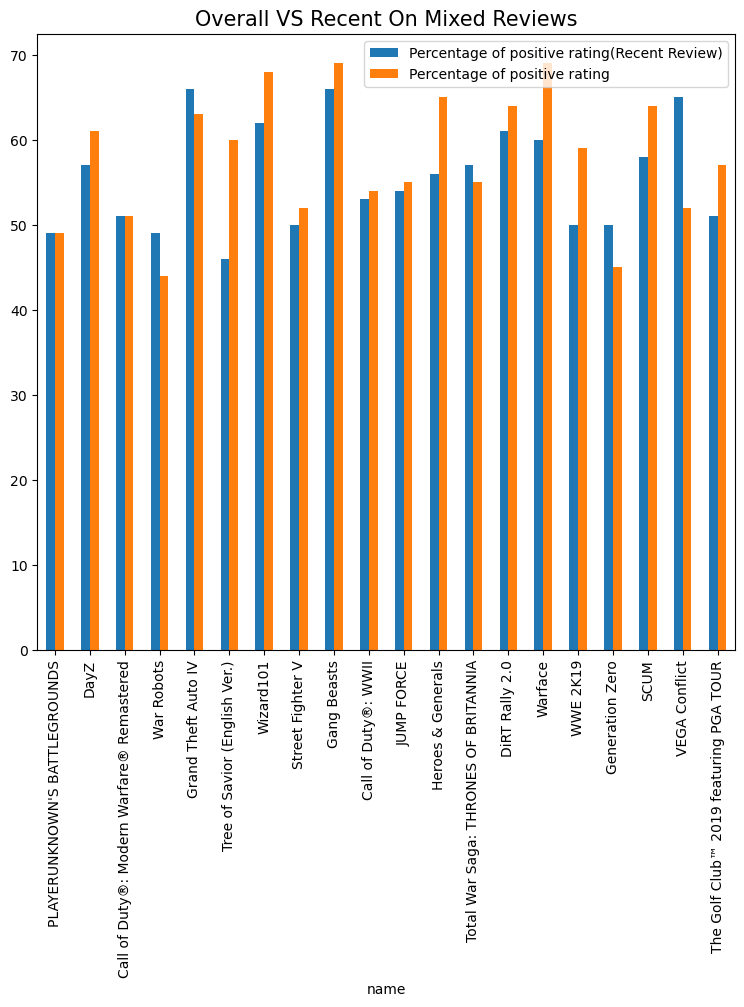

In [647]:
import pandas as pd
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt


tempt2['Percentage of positive rating(Recent Review)']=tempt2['Percentage of positive rating(Recent Review)'].astype(int)
tempt2['Percentage of positive rating']=tempt2['Percentage of positive rating'].astype(int)

data1 = tempt2.head(20)
tempt2 = pd.DataFrame(data1, columns= ["name","Percentage of positive rating(Recent Review)", "Percentage of positive rating"])

tempt2.plot(x="name", y = ["Percentage of positive rating(Recent Review)", "Percentage of positive rating"], kind ="bar", figsize=(9,8))
plt.title("Overall VS Recent On Mixed Reviews", fontsize = 15)

mp.show()

In [650]:
# df2 = tempt2.sort_values(by="Number of users", ascending=False)
# df2 


# Conclusion

### How many games that have a very positive and mixed reviews for both overall and recent reviews?

### - There are 974 games that are reviewed very positive out of 2519 games with different user reviews and there are 287 games out of 2519 that have mixed reviews. 

### Does the percent score for different review games being influenced by the percent of reviewers?

### - The results shows that if there is an increase in user's review, there will can be an increase, decrease or no change in very positive review that the user rated on the specific type of games.
